# Data Visualizations

This notebook shows some visualizations of the data used in the causal model.
- Traversal temperature
- NDVI
- Albedo
- NLCD

In [97]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker

import rasterio as rio
import cartopy.crs as ccrs
import geopandas as gpd

In [102]:
# Read data from files
temp = gpd.read_file('..\data\Traversal\Boston_ev.shp')

tif_path = "..\data\Boston\Boston_ndvi.tif"
with rio.open(tif_path) as src:
    ndvi = src.read(1)
    bounds = src.bounds
    crs = src.crs

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\B'
C:\Users\esl26\AppData\Local\Temp\ipykernel_46092\559786703.py:2: SyntaxWarning: invalid escape sequence '\d'
  temp = gpd.read_file('.\data\Traversal\Boston_ev.shp')
C:\Users\esl26\AppData\Local\Temp\ipykernel_46092\559786703.py:4: SyntaxWarning: invalid escape sequence '\B'
  tif_path = "data\Boston\Boston_ndvi.tif"


## Traversal temperature

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


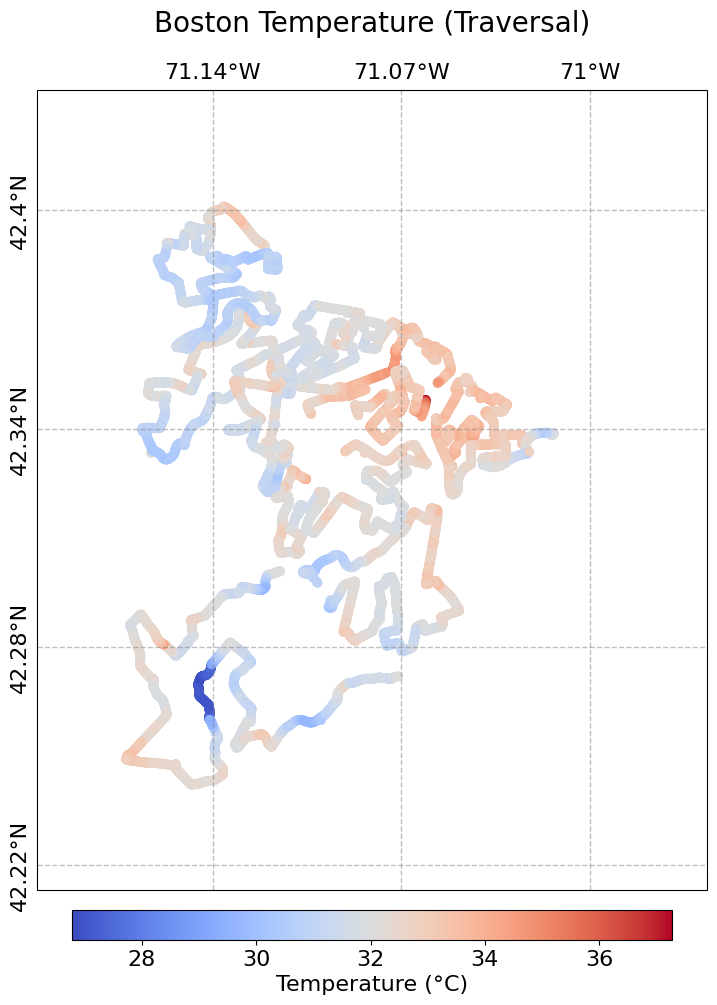

In [94]:
# First, visualize the temperature dataset

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})

# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])

# Convert from EPSG: 4326 to EPSG: 3857
temp = temp.to_crs(epsg=3857)

# Scatter plot
ig = ax.scatter(temp.geometry.x, temp.geometry.y, c=(temp['HI_C']),cmap='coolwarm')

# Colorbar at the bottom
cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_xlabel('Temperature (°C)',fontsize=16)
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)

fig.suptitle('Boston Temperature (Traversal)', fontsize=20)

# Save the figure
plt.savefig('./figures/boston_temp.png', dpi=300, bbox_inches='tight')
plt.show()

### Temperature vs. Sensor Speed

I was wondering if there was a correlation between the two variables.

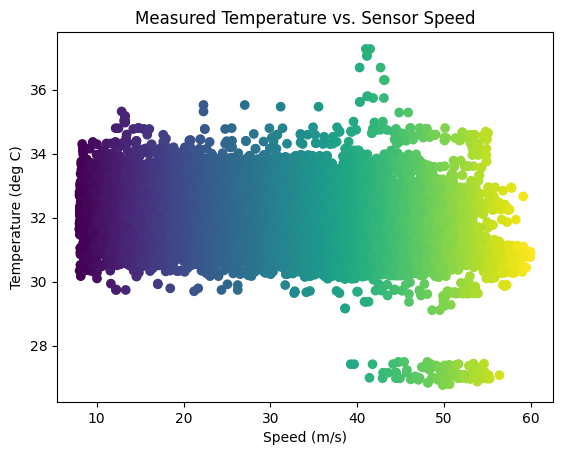

In [95]:
# Plot temperature against speed of sensor at the time of measurement
x = temp['speed']
y = temp['HI_C']
plt.scatter(x,y, c=x, cmap='viridis', marker = 'o')
plt.title('Measured Temperature vs. Sensor Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Temperature (deg C)')
plt.show()

## NDVI

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


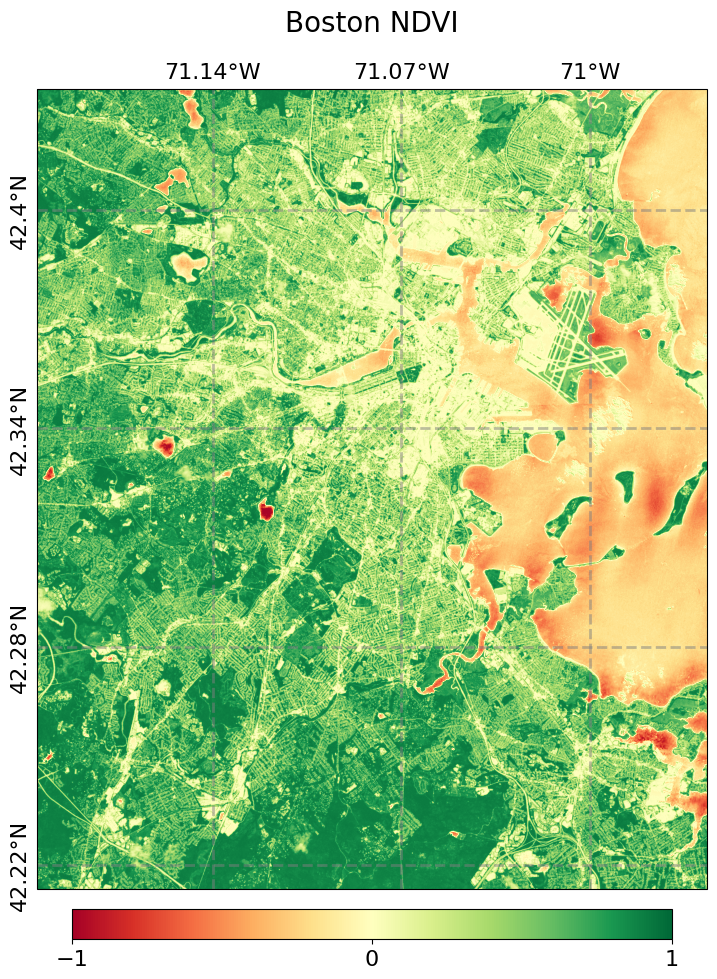

In [99]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Set fixed locator values for gridlines
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])
img = ax.imshow(ndvi, cmap='RdYlGn', extent=img_extent, vmax=1, vmin=-1)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.03])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal', pad=0.05, ticks=[-1, 0, 1])
cbar.ax.tick_params(labelsize=16)

fig.suptitle('Boston NDVI', fontsize=20)

# cbar.ax.set_xlabel('NDVI', fontsize=24)
plt.savefig('./figures/boston_ndvi.png', dpi=300, bbox_inches='tight')